# <img style="float: left; padding-right: 10px; width: 150px" src="https://sc.acamica.com/icons/1j7w9h/social-300x300.png">  Acámica DS-COR3 - Ejercicio de Machine Learning

### Junio 2019

<hr style="height:2pt">

## Descripción

El objetivo de este notebook es ejercitar el concepto de deep learning y redes neuronales. Para simplificar el ejercicio, se trabajará con el data set de los digitos manuscritos, el MNIST, ya provisto por tensorflorw. El mismo consisite en 60000 imágenes de números de 0 al 9 de dimensión 28 x 28 para el conjunto de entrenamiento y 15000 imágenes para el conjunto de testeo de igual dimensión. Se pretende obtener una red neuronal de una capa o multicapa, que utilice algunos de los optimizadores vistos, Adam optimaizer, SGD, etc. Notar que es el primer dataset de imagenes que se trabaja.

Al final de la descricción se deja una Noetebook que sirve como guía, para el mismo.

**Recursos**:  

- http://yann.lecun.com/exdb/mnist/ 
- https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457 
- https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
- http://androidkt.com/cnn-keras-with-mnist-accuracy-9953/
- https://mohitatgithub.github.io/2018-03-28-MNIST-Image-Classification-with-CNN-&-Keras/

In [1]:
# Dependencias
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
len(mnist.train.images)

55000

In [4]:
len(mnist.test.images)

10000

In [5]:
im_temp = mnist.train.images[0]

In [28]:
import numpy as np
import matplotlib.pyplot

In [29]:
print(np.reshape(im_temp, (28,28)))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

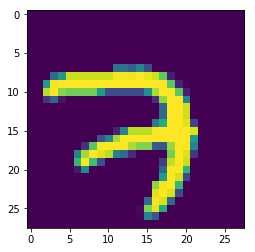

In [30]:
matplotlib.pyplot.imshow(np.reshape(im_temp, (28,28)))

In [11]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del datset es un número real entre 0 y 1.

y = softmax(W * x + b)

In [12]:
dim_input = 784
n_categories = 10

In [13]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [14]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [15]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

#### Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [16]:
from IPython.display import display, Math, Latex

In [17]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [18]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [ ]:
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [20]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [21]:
session = tf.InteractiveSession()

In [22]:
tf.global_variables_initializer().run()

In [23]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

#### Evaluando la red neuronal

In [24]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [25]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [26]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9261
